<a href="https://colab.research.google.com/github/sivaadharsh28/Recommendation-System/blob/main/imda_data_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gdown
import gdown

# Step 1: Download the zipped folder from Google Drive
file_id = '1YllimFCL8B_c7glSN-jj28BHNtSbgY-E'  # Replace with your file ID
gdown.download(f'https://drive.google.com/uc?id={file_id}', 'dataset.zip', quiet=False)

# Step 2: Unzip the folder
!unzip dataset.zip -d dataset_folder

# Step 3: Store the path to the folder
folder_path = '/content/dataset_folder'

# Example: List the files in the folder to verify
import os
print(os.listdir(folder_path))


Downloading...
From: https://drive.google.com/uc?id=1YllimFCL8B_c7glSN-jj28BHNtSbgY-E
To: /content/dataset.zip
100%|██████████| 429k/429k [00:00<00:00, 67.3MB/s]


Archive:  dataset.zip
  inflating: dataset_folder/Dataset for 20 persons/._.DS_Store  
  inflating: dataset_folder/Dataset for 20 persons/.DS_Store  
   creating: dataset_folder/Dataset for 20 persons/person1/
  inflating: dataset_folder/Dataset for 20 persons/person1/._.DS_Store  
  inflating: dataset_folder/Dataset for 20 persons/person1/.DS_Store  
   creating: dataset_folder/Dataset for 20 persons/person1/FairPrice/
  inflating: dataset_folder/Dataset for 20 persons/person1/FairPrice/._.DS_Store  
  inflating: dataset_folder/Dataset for 20 persons/person1/FairPrice/.DS_Store  
   creating: dataset_folder/Dataset for 20 persons/person1/FairPrice/Customer/
  inflating: dataset_folder/Dataset for 20 persons/person1/FairPrice/Customer/customer.json  
   creating: dataset_folder/Dataset for 20 persons/person1/FairPrice/SKU Table/
  inflating: dataset_folder/Dataset for 20 persons/person1/FairPrice/SKU Table/sku-table.json  
   creating: dataset_folder/Dataset for 20 persons/person1/Fair

In [ ]:
import os
import json
import pandas as pd

# Function to load and preprocess JSON data
def load_json_file(filepath):
    with open(filepath, 'r') as file:
        data = json.load(file)
    return data

# Function to preprocess Fitbit, Spotify, and YouTube data for all users
def preprocess_data(root_dir):
    all_user_data = []

    # Loop through each person[i] folder
    for person_folder in os.listdir(root_dir):
        person_path = os.path.join(root_dir, person_folder)

        if os.path.isdir(person_path):  # Check if it's a directory (person[i])
            user_data = {
                'person_id': person_folder,
                'fitbit': {},
                'spotify': {},
                'youtube': {},
                'mastercard': {},
                'ocbc' : {},
                'fairprice' : {},
                'lazada' :{}
            }

            # Fitbit data processing
            fitbit_folder = os.path.join(person_path, 'Fitbit')
            if os.path.exists(fitbit_folder):
                user_data['fitbit'] = preprocess_fitbit_data(fitbit_folder)

            # Spotify data processing
            spotify_folder = os.path.join(person_path, 'Spotify')
            if os.path.exists(spotify_folder):
                user_data['spotify'] = preprocess_spotify_data(spotify_folder)

            # YouTube data processing
            youtube_folder = os.path.join(person_path, 'Youtube')
            if os.path.exists(youtube_folder):
                user_data['youtube'] = preprocess_youtube_data(youtube_folder)

            # Mastercard data processing
            mastercard_folder = os.path.join(person_path, 'Mastercard')
            if os.path.exists(mastercard_folder):
                user_data['mastercard'] = preprocess_mastercard_data(mastercard_folder)

            # Ocbc data processing
            ocbc_folder = os.path.join(person_path, 'Ocbc')
            if os.path.exists(ocbc_folder):
                user_data['ocbc'] = preprocess_ocbc_data(ocbc_folder)

            # Fairprice data processing
            fairprice_folder = os.path.join(person_path, 'FairPrice')
            if os.path.exists(fairprice_folder):
                user_data['fairprice'] = preprocess_fairprice_data(fairprice_folder)

            # Lazada data processing
            lazada_folder = os.path.join(person_path, 'Lazada')
            if os.path.exists(lazada_folder):
                user_data['lazada'] = preprocess_lazada_data(lazada_folder)

            all_user_data.append(user_data)

    return all_user_data

    # Function to preprocess Fitbit data for a single person
def preprocess_fitbit_data(fitbit_folder):
    fitbit_data = {
        'food': [],
        'profile': [],
        'sleep': [],
        'water': [],
        'weight': []
    }


    if not os.path.exists(fitbit_folder):
        print(f"Error: Path {fitbit_folder} does not exist.")
        return None

    # Process the Fitbit subfolders
    for folder in os.listdir(fitbit_folder):
        folder_path = os.path.join(fitbit_folder, folder)
        #print(f"Processing folder: {folder_path}")

        if os.path.isdir(folder_path):
            for file in os.listdir(folder_path):
                file_path = os.path.join(folder_path, file)
                #print(f"Reading file: {file_path}")


                if file.endswith('.json'):
                    data = load_json_file(file_path)

                    # Check if data was loaded successfully
                    if data is None:
                        print(f"Failed to load JSON file: {file_path}")
                        continue

                    # Check if 'data' is a list or dict and handle accordingly
                    if isinstance(data, list):
                        entries = data  # It's a list, so assign it directly to process each entry
                    else:
                        entries = [data]  # Wrap in a list to process as a single item

                     # Normalize folder name to lowercase
                    folder_lower = folder.lower()

                    if folder_lower == 'food':
                        #print(f"Processing food data: {entries}")
                        # Extract relevant fields from the foods.json structure
                        for entry in entries:
                            logged_food = entry.get('loggedFood', {})
                            nutrition = entry.get('nutritionalValues', {})
                            if logged_food:
                                fitbit_data['food'].append({
                                    'logDate': entry.get('logDate', ''),
                                    'isFavorite': entry.get('isFavorite', False),
                                    'food_name': logged_food.get('name', ''),
                                    'brand': logged_food.get('brand', ''),
                                    'calories': logged_food.get('calories', 0),
                                    'meal_type': logged_food.get('mealTypeId', ''),
                                    'amount': logged_food.get('amount', 0),
                                    'unit_name': logged_food.get('unit', {}).get('name', ''),
                                    'carbs': nutrition.get('carbs', 0),
                                    'fat': nutrition.get('fat', 0),
                                    'fiber': nutrition.get('fiber', 0),
                                    'protein': nutrition.get('protein', 0),
                                    'sodium': nutrition.get('sodium', 0)
                                })
                                # Debug: Print the extracted food data
                                #print(f"Extracted food data: {fitbit_data['food'][-1]}")
                            else:
                                print(f"No 'loggedFood' found in entry: {entry}")

                    # Process profile data
                    elif folder_lower == 'profile':
                        #print(f"Processing profile data: {data}")
                        # Extracting relevant profile information
                        fitbit_data['profile'] = {
                            'age': data.get('age', None),
                            'full_name': data.get('fullName', ''),
                            'display_name': data.get('displayName', ''),
                            'date_of_birth': data.get('dateOfBirth', ''),
                            'gender': data.get('gender', ''),
                            'height': data.get('height', 0),
                            'average_daily_steps': data.get('averageDailySteps', 0),
                            'corporate': data.get('corporate', False),
                            'distance_unit': data.get('distanceUnit', ''),
                            'clock_format': data.get('clockTimeDisplayFormat', ''),
                            'avatar_url': data.get('avatar', ''),
                            'encoded_id': data.get('encodedId', '')
                        }
                        # Debug: Print the extracted profile data
                        #print(f"Extracted profile data: {fitbit_data['profile']}")

                        # Process sleep data
                    elif folder_lower == 'sleep':
                            #print(f"Processing sleep data: {data}")
                            for entry in entries:
                                # Extract relevant sleep information
                                levels = entry.get('levels', {}).get('summary', {})
                                fitbit_data['sleep'].append({
                                    'date_of_sleep': entry.get('dateOfSleep', ''),
                                    'duration': entry.get('duration', 0),
                                    'efficiency': entry.get('efficiency', 0),
                                    'start_time': entry.get('startTime', ''),
                                    'end_time': entry.get('endTime', ''),
                                    'is_main_sleep': entry.get('isMainSleep', False),
                                    'minutes_asleep': entry.get('minutesAsleep', 0),
                                    'time_in_bed': entry.get('timeInBed', 0),
                                    'asleep_minutes': levels.get('asleep', {}).get('minutes', 0),
                                    'awake_minutes': levels.get('awake', {}).get('minutes', 0),
                                    'restless_minutes': levels.get('restless', {}).get('minutes', 0),
                                    'log_type': entry.get('logType', ''),
                                    'log_id': entry.get('logId', ''),
                                    'type': entry.get('type', '')
                                })
                                # Debug: Print the extracted sleep data
                                #print(f"Extracted sleep data: {fitbit_data['sleep'][-1]}")


                    # Process water data
                    elif folder_lower == 'water':
                        #print(f"Processing water data: {data}")
                        for entry in entries:
                            # Extract summary water data and individual water logs
                            summary_water = entry.get('summary', {}).get('water', 0)
                            water_logs = entry.get('water', [])

                            # Add the summary water data
                            fitbit_data['water'].append({
                                'summary_water': summary_water
                            })

                            # Add individual water log entries
                            for log in water_logs:
                                fitbit_data['water'].append({
                                    'amount': log.get('amount', 0),
                                    'log_id': log.get('logId', '')
                                })
                            # Debug: Print the extracted water data
                            #print(f"Extracted water data: {fitbit_data['water'][-1]}")

                    # Process weight data
                    elif folder_lower == 'weight':
                        #print(f"Processing weight data: {data}")
                        for entry in entries:
                            # Iterate over weight logs
                            weight_logs = entry.get('weight', [])

                            # Add individual weight log entries
                            for log in weight_logs:
                                fitbit_data['weight'].append({
                                    'bmi': log.get('bmi', 0),
                                    'date': log.get('date', ''),
                                    'fat_percentage': log.get('fat', 0),
                                    'log_id': log.get('logId', ''),
                                    'source': log.get('source', ''),
                                    'time': log.get('time', ''),
                                    'weight_kg': log.get('weight', 0)  # Assuming weight is in kilograms
                                })
                            # Debug: Print the extracted weight data
                            #print(f"Extracted weight data: {fitbit_data['weight'][-1]}")


    return fitbit_data


# Function to preprocess Spotify data for a single person
def preprocess_spotify_data(spotify_folder):
    spotify_data = {
        'spotify_albums': [],
        'spotify_playlists': [],
        'spotify_profile': {},
        'spotify_top_artists_or_tracks': []
    }

    if not os.path.exists(spotify_folder):
        print(f"Error: Path {spotify_folder} does not exist.")
    #return None

    # Process the Fitbit subfolders
    for folder in os.listdir(spotify_folder):
        folder_path = os.path.join(spotify_folder, folder)
        #print(f"Processing folder: {folder_path}")

        if os.path.isdir(folder_path):
            for file in os.listdir(folder_path):
                file_path = os.path.join(folder_path, file)
                #print(f"Reading file: {file_path}")


                if file.endswith('.json'):
                    data = load_json_file(file_path)

                    # Check if data was loaded successfully
                    if data is None:
                        print(f"Failed to load JSON file: {file_path}")
                        continue

                    # Check if 'data' is a list or dict and handle accordingly
                    if isinstance(data, list):
                        entries = data  # It's a list, so assign it directly to process each entry
                    else:
                        entries = [data]  # Wrap in a list to process as a single item

                     # Normalize folder name to lowercase
                    folder_lower = folder.lower()

                    # Process Spotify data (assuming one or more JSON files)
                    # Process Albums data
                    if folder_lower == 'albums':
                        #print(f"Processing albums data: {data}")

                        # Iterate over the 'items' list
                        for item in data.get('items', []):
                            album = item.get('album', {})
                            artist = album.get('artists', [{}])[0]  # Get the first artist

                            # Extract album and artist information
                            spotify_data['spotify_albums'].append({
                                'added_at': item.get('added_at', ''),
                                'album_name': album.get('name', ''),
                                'album_type': album.get('album_type', ''),
                                'artist_name': artist.get('name', ''),
                                'release_date': album.get('release_date', ''),
                                'total_tracks': album.get('total_tracks', 0),
                                'available_markets': album.get('available_markets', []),
                                'album_url': album.get('external_urls', {}).get('spotify', ''),
                                'artist_url': artist.get('external_urls', {}).get('spotify', ''),
                                'album_image_url': album.get('images', [{}])[0].get('url', ''),
                                'track_list_url': album.get('tracks', {}).get('href', '')
                            })

                            # Debug: Print the extracted album data
                            #print(f"Extracted album data: {spotify_data['spotify_albums'][-1]}")

                    # Process Playlists data
                    elif folder_lower == 'playlists':
                        #print(f"Processing playlists data: {data}")

                        # Iterate over the 'items' list
                        for item in data.get('items', []):
                            owner = item.get('owner', {})

                            # Extract playlist and owner information
                            spotify_data['spotify_playlists'].append({
                                'playlist_name': item.get('name', ''),
                                'description': item.get('description', ''),
                                'collaborative': item.get('collaborative', False),
                                'public': item.get('public', False),
                                'total_tracks': item.get('tracks', {}).get('total', 0),
                                'playlist_url': item.get('external_urls', {}).get('spotify', ''),
                                'playlist_image_url': item.get('images', [{}])[0].get('url', ''),
                                'owner_display_name': owner.get('display_name', ''),
                                'owner_id': owner.get('id', ''),
                                'owner_url': owner.get('external_urls', {}).get('spotify', ''),
                                'owner_followers': owner.get('followers', {}).get('total', 0),
                                'snapshot_id': item.get('snapshot_id', ''),
                                'tracks_url': item.get('tracks', {}).get('href', '')
                            })

                            # Debug: Print the extracted playlist data
                            #print(f"Extracted playlist data: {spotify_data['spotify_playlists'][-1]}")

                    # Process Profile data
                    elif folder_lower == 'profile':
                        #print(f"Processing Spotify profile data: {data}")

                        # Extract profile information
                        spotify_data['spotify_profile'] = {
                            'display_name': data.get('display_name', ''),
                            'email': data.get('email', ''),
                            'country': data.get('country', ''),
                            'explicit_content_filter_enabled': data.get('explicit_content', {}).get('filter_enabled', False),
                            'explicit_content_filter_locked': data.get('explicit_content', {}).get('filter_locked', False),
                            'profile_url': data.get('external_urls', {}).get('spotify', ''),
                            'followers_total': data.get('followers', {}).get('total', 0),
                            'profile_image_url': data.get('images', [{}])[0].get('url', ''),
                            'product': data.get('product', ''),
                            'user_id': data.get('id', ''),
                            'uri': data.get('uri', '')
                        }

                        # Debug: Print the extracted profile data
                        #print(f"Extracted Spotify profile data: {spotify_data['spotify_profile']}")

                    # Process Top Artists or Tracks data
                    elif folder_lower == 'topartistsortracks':
                        #print(f"Processing top artists or tracks data: {data}")

                        # Iterate over the 'items' list
                        for item in data.get('items', []):
                            artist = item

                            # Extract artist information
                            spotify_data['spotify_top_artists_or_tracks'].append({
                                'artist_name': artist.get('name', ''),
                                'followers_total': artist.get('followers', {}).get('total', 0),
                                'genres': artist.get('genres', []),
                                'popularity': artist.get('popularity', 0),
                                'artist_url': artist.get('external_urls', {}).get('spotify', ''),
                                'artist_image_url': artist.get('images', [{}])[0].get('url', ''),
                                'uri': artist.get('uri', '')
                            })

                            # Debug: Print the extracted top artist or track data
                            #print(f"Extracted top artist data: {spotify_data['spotify_top_artists_or_tracks'][-1]}")


    return spotify_data

# Function to preprocess YouTube data for a single person
def preprocess_youtube_data(youtube_folder):
    youtube_data = {
        'likedvideos': []
    }

    if not os.path.exists(youtube_folder):
        print(f"Error: Path {youtube_folder} does not exist.")
    #return None

    # Process the youtube subfolders
    for folder in os.listdir(youtube_folder):
        folder_path = os.path.join(youtube_folder, folder)
        #print(f"Processing folder: {folder_path}")

        if os.path.isdir(folder_path):
            for file in os.listdir(folder_path):
                file_path = os.path.join(folder_path, file)
                #print(f"Reading file: {file_path}")


                if file.endswith('.json'):
                    data = load_json_file(file_path)

                    # Check if data was loaded successfully
                    if data is None:
                        print(f"Failed to load JSON file: {file_path}")
                        continue

                    # Check if 'data' is a list or dict and handle accordingly
                    if isinstance(data, list):
                        entries = data  # It's a list, so assign it directly to process each entry
                    else:
                        entries = [data]  # Wrap in a list to process as a single item

                     # Normalize folder name to lowercase
                    folder_lower = folder.replace('_', '-').lower().strip()
                    # Process YouTube video data
                    if folder_lower == 'likedvideos':
                        #print(f"Processing YouTube video data: {data}")

                        # Iterate over the 'items' list
                        for item in data.get('items', []):
                            snippet = item.get('snippet', {})

                            # Extract YouTube video information
                            youtube_data['likedvideos'].append({
                                'video_id': item.get('id', ''),
                                'title': snippet.get('title', ''),
                                'description': snippet.get('description', ''),
                                'published_at': snippet.get('publishedAt', ''),
                                'thumbnail_default_url': snippet.get('thumbnails', {}).get('default', {}).get('url', ''),
                                'thumbnail_medium_url': snippet.get('thumbnails', {}).get('medium', {}).get('url', ''),
                                'thumbnail_high_url': snippet.get('thumbnails', {}).get('high', {}).get('url', '')
                            })

                            # Debug: Print the extracted YouTube video data
                            #print(f"Extracted YouTube video data: {youtube_data['likedvideos'][-1]}")


    return youtube_data

    # Function to preprocess Mastercard data for a single person
def preprocess_mastercard_data(mastercard_folder):
    mastercard_data = {
        'mastercard_transactions': []
    }

    if not os.path.exists(mastercard_folder):
        print(f"Error: Path {mastercard_folder} does not exist.")
    #return None

    # Process the youtube subfolders
    for folder in os.listdir(mastercard_folder):
        folder_path = os.path.join(mastercard_folder, folder)
        #print(f"Processing folder: {folder_path}")

        if os.path.isdir(folder_path):
            for file in os.listdir(folder_path):
                file_path = os.path.join(folder_path, file)
                #print(f"Reading file: {file_path}")


                if file.endswith('.json'):
                    data = load_json_file(file_path)

                    # Check if data was loaded successfully
                    if data is None:
                        print(f"Failed to load JSON file: {file_path}")
                        continue

                    # Check if 'data' is a list or dict and handle accordingly
                    if isinstance(data, list):
                        entries = data  # It's a list, so assign it directly to process each entry
                    else:
                        entries = [data]  # Wrap in a list to process as a single item

                     # Normalize folder name to lowercase
                    folder_lower = folder.lower()
                    #print(folder_lower)
                    # Process Mastercard data
                    if folder_lower == 'mastercardtransactions':
                        #print(f"Processing Mastercard transaction data: {data}")

                        # Extract Mastercard transaction information
                        mastercard_data['mastercard_transactions'].append({
                            'transaction_date': data.get('date', ''),
                            'merchant': data.get('merchant', ''),
                            'category': data.get('category', ''),
                            'transaction_amount': data.get('transactionAmount', 0.0)
                        })

                        # Debug: Print the extracted Mastercard transaction data
                    #print(f"Extracted Mastercard transaction data: {mastercard_data['mastercard_transactions'][-1]}")

    return mastercard_data


def preprocess_ocbc_data(ocbc_folder):
    ocbc_data = {
        'parent': [],
        'child' : []
    }

    if not os.path.exists(ocbc_folder):
        print(f"Error: Path {ocbc_folder} does not exist.")
    #return None

    # Process the youtube subfolders
    for folder in os.listdir(ocbc_folder):
        folder_path = os.path.join(ocbc_folder, folder)
        #print(f"Processing folder: {folder_path}")

        if os.path.isdir(folder_path):
            for file in os.listdir(folder_path):
                file_path = os.path.join(folder_path, file)
                #print(f"Reading file: {file_path}")


                if file.endswith('.json'):
                    data = load_json_file(file_path)

                    # Check if data was loaded successfully
                    if data is None:
                        #print(f"Failed to load JSON file: {file_path}")
                        continue

                    # Check if 'data' is a list or dict and handle accordingly
                    if isinstance(data, list):
                        entries = data  # It's a list, so assign it directly to process each entry
                    else:
                        entries = [data]  # Wrap in a list to process as a single item

                     # Normalize folder name to lowercase
                    folder_lower = folder.lower()

                    if folder_lower == 'parental pods':
                        #print(f"Processing Parental PODS data: {data}")

                        # Extract Parental PODS information
                        ocbc_data['parent'].append({
                            'parent_guardian_pod_id': data.get('ParentGuardianPODID', ''),
                            'parent_guardian_id': data.get('ParentGuardianID', ''),
                            'parent_guardian_name': data.get('ParentGuardianName', ''),
                            'contact_information': data.get('ContactInformation', '')
                        })

                        # Debug: Print the extracted Parental PODS data
                        #print(f"Extracted Parental PODS data: {ocbc_data['parent'][-1]}")

                        if folder_lower == 'child customer information':
                        #print(f"Processing child customer information: {data}")

                            # Extract child customer information
                            ocbc_data['child'].append({
                                'child_customer_id': data.get('ChildCustomerID', ''),
                                'child_name': data.get('ChildName', ''),
                                'date_of_birth': data.get('DateOfBirth', ''),
                                'age': data.get('Age', 0)
                                })

                        # Debug: Print the extracted Parental PODS data
                        #print(f"Extracted Parental PODS data: {ocbc_data['parent'][-1]}")

    return ocbc_data


# Function to preprocess fairprice data
def preprocess_fairprice_data(fairprice_folder):
    fairprice_data = {
        'customers': [],
        'sku_table': [],
        'stores': [],
        'transactions': []
    }

    # Process the subfolders in the fairprice directory (Fairprice)
    for folder in os.listdir(fairprice_folder):
        folder_path = os.path.join(fairprice_folder, folder)
        #print(f"Processing folder: {folder_path}")

        if os.path.isdir(folder_path):
            # Process each subfolder based on its type
            folder_lower = folder.lower()

            for file in os.listdir(folder_path):
                file_path = os.path.join(folder_path, file)
                if file.endswith('.json'):
                    data = load_json_file(file_path)

                    if data is None:
                        print(f"Failed to load JSON file: {file_path}")
                        continue

                    # Normalize folder name to lowercase
                    folder_lower = folder.lower()
                    # Process Customer data
                    if folder_lower == 'customer':
                        fairprice_data['customers'].append({
                            'customer_id': data.get('customer_id', ''),
                            'customer_age': data.get('customer_age', ''),
                            'customer_gender': data.get('customer_gender', ''),
                            'postal_code': data.get('postal_code', '')
                        })
                        #print(f"Extracted customer data: {fairprice_data['customers'][-1]}")

                    # Process SKU Table data
                    elif folder_lower == 'sku table':
                        fairprice_data['sku_table'].append({
                            'sku_id': data.get('sku_id', ''),
                            'sku_name': data.get('sku_name', ''),
                            'sku_category': data.get('sku_category', ''),
                            'sku_unit_price': float(data.get('sku_unit_price', 0.0))
                        })
                        #print(f"Extracted SKU data: {fairprice_data['sku_table'][-1]}")

                    # Process Store data
                    elif folder_lower == 'store':
                        fairprice_data['stores'].append({
                            'store_id': data.get('store_id', ''),
                            'store_name': data.get('store_name', ''),
                            'store_postal': data.get('store_postal', ''),
                            'store_type': data.get('store_type', '')
                        })
                        #print(f"Extracted store data: {fairprice_data['stores'][-1]}")

                    # Process Transaction Header (TXN Header) data
                    elif folder_lower == 'txn header':
                        fairprice_data['transactions'].append({
                            'txn_id': data.get('txn_id', ''),
                            'date': data.get('date', ''),
                            'customer_id': data.get('customer_id', ''),
                            'store_id': data.get('store_id', ''),
                            'amount': float(data.get('amount', 0.0)),
                            'earn_points': int(data.get('earn_points', 0)),
                            'redeem_points': int(data.get('redeem_points', 0)),
                            'items': []  # To be populated from TXN Item data
                        })
                        #print(f"Extracted transaction header: {fairprice_data['transactions'][-1]}")

                    # Process Transaction Item (TXN Item) data
                    elif folder_lower == 'txn item':
                        txn_id = data.get('txn_id', '')
                        transaction = next((txn for txn in fairprice_data['transactions'] if txn['txn_id'] == txn_id), None)

                        if transaction:
                            transaction['items'].append({
                                'sku_id': data.get('sku_id', ''),
                                'quantity': int(data.get('quantity', 0)),
                                'amount': float(data.get('amount', 0.0))
                            })
                            #print(f"Extracted transaction item for TXN {txn_id}: {transaction['items'][-1]}")

    return fairprice_data

# Function to preprocess Lazada data
def preprocess_lazada_data(lazada_folder):
    lazada_data = {
        'account_info': {},
        'address': {},
        'message_preferences': {},
        'preferred_language': ''
    }

    # Process the subfolders in the Lazada directory
    for folder in os.listdir(lazada_folder):
        folder_path = os.path.join(lazada_folder, folder)
        #print(f"Processing folder: {folder_path}")

        if os.path.isdir(folder_path):
            for file in os.listdir(folder_path):
                file_path = os.path.join(folder_path, file)
                if file.endswith('.json'):
                    data = load_json_file(file_path)

                    if data is None:
                        print(f"Failed to load JSON file: {file_path}")
                        continue
                    folder_lower = folder.lower()
                    # Process Account Info
                    if folder_lower == 'account info':
                        lazada_data['account_info'] = {
                            'name': data.get('Name', ''),
                            'id': data.get('ID', ''),
                            'face_id_enabled': data.get('FaceID', False),
                            'mobile': data.get('Mobile', ''),
                            'email': data.get('Email', ''),
                            'gender': data.get('Gender', ''),
                            'birthday': data.get('Birthday', '')
                        }
                        #print(f"Extracted account info: {lazada_data['account_info']}")

                    # Process Address
                    elif folder_lower == 'address':
                        lazada_data['address'] = {
                            'address_line': data.get('AddressLine', ''),
                            'postal': data.get('Postal', '')
                        }
                        #print(f"Extracted address info: {lazada_data['address']}")

                    # Process Message Preferences
                    elif folder_lower == 'message preferences':
                        lazada_data['message_preferences'] = {
                            'promotions_offers': data.get('Promotions', {}).get('Offers', False),
                            'promotions_recommendations': data.get('Promotions', {}).get('Recommendations', False),
                            'orders': data.get('Orders', False),
                            'activities': data.get('Activities', False)
                        }
                        #print(f"Extracted message preferences: {lazada_data['message_preferences']}")

                    # Process Preferred Language
                    elif folder_lower == 'preferred language':
                        lazada_data['preferred_language'] = data
                        #print(f"Extracted preferred language: {lazada_data['preferred_language']}")

    return lazada_data


# Example usage
# root_directory = '/content/drive/MyDrive/Dataset_for_20 persons'
root_directory = '/content/dataset_folder/Dataset for 20 persons'
user_data = preprocess_data(root_directory)

# Convert the processed data into a pandas DataFrame for further analysis
# Here, we are assuming that the user_data is structured as a list of dictionaries
df_fitbit = pd.DataFrame([person['fitbit']['profile'] for person in user_data if person['fitbit']['profile']])
df_spotify = pd.DataFrame([person['spotify']['spotify_profile'] for person in user_data if person['spotify']['spotify_profile']])
df_youtube = pd.DataFrame([person['youtube']['likedvideos'] for person in user_data if person['youtube']['likedvideos']])
df_mastercard = pd.DataFrame([person['mastercard']['mastercard_transactions'] for person in user_data if person['mastercard']['mastercard_transactions']])
df_ocbc = pd.DataFrame([person['ocbc'] for person in user_data if person['ocbc']])
df_fairprice = pd.DataFrame([person['fairprice'] for person in user_data if person['fairprice']])
df_lazada = pd.DataFrame([person['lazada'] for person in user_data if person['lazada']])


# Print some examples to visualize the processed data
print("Fitbit Profile Data:")
print(df_fitbit)

print("\nSpotify Data:")
print(df_spotify)

print("\nYouTube Data:")
print(df_youtube)

print("\nMastercard Data:")
print(df_mastercard)

print("\nOcbc Data:")
print(df_ocbc)

print("\nFairprice Data:")
print(df_fairprice)

print("\nLazada Data:")
print(df_lazada)

Fitbit Profile Data:
    age          full_name display_name date_of_birth  gender  height  \
0    29         Emma Lewis      Emma L.    1994-05-15  FEMALE     160   
1    29    Emily Rodriguez     Emily R.    1994-01-11  FEMALE     165   
2    32        Mia Roberts       Mia R.    1992-05-15  FEMALE     165   
3    31  Michael Patterson   Michael P.    1992-04-20    MALE     182   
4    30       Emma Johnson      Emma J.    1994-10-22  FEMALE     160   
5    35       Alex Johnson      Alex J.    1988-11-01    MALE     182   
6    29    Emily Rodriguez     Emily R.    1994-01-11  FEMALE     165   
7    29         Taylor Fox    Taylor F.    1995-02-14  FEMALE     167   
8    27   Michael Robinson   Michael R.    1996-11-05    MALE     178   
9    27         Ryan Clark      Ryan C.    1996-08-25    MALE     175   
10   27         Jordan Lee    Jordan L.    1997-09-10    MALE     175   
11   28      Jonathan Wong  Jonathan W.    1996-02-27    MALE     177   
12   32      Alex Thompson    

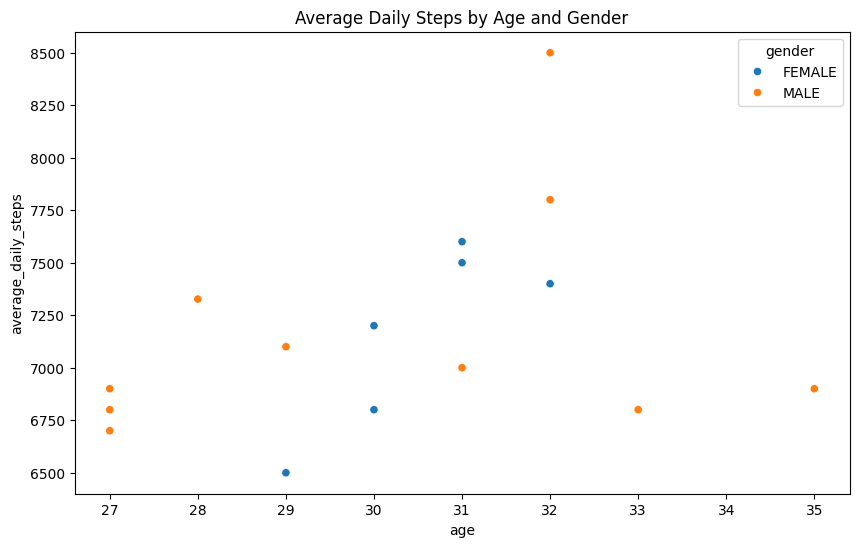

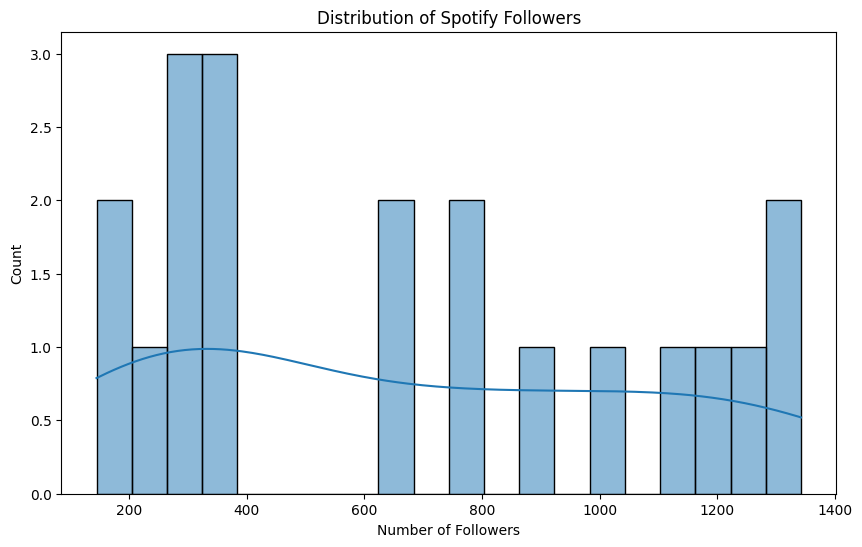

Mastercard DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       20 non-null     object
dtypes: object(1)
memory usage: 288.0+ bytes
None

Mastercard DataFrame head:
                                                   0
0  {'transaction_date': '2024-07-29 03:40 pm', 'm...
1  {'transaction_date': '2024-08-11 09:30 pm', 'm...
2  {'transaction_date': '2024-08-04 12:15 pm', 'm...
3  {'transaction_date': '2024-08-12 06:58 pm', 'm...
4  {'transaction_date': '2024-08-02 09:10 am', 'm...

Mastercard DataFrame dtypes:
0    object
dtype: object


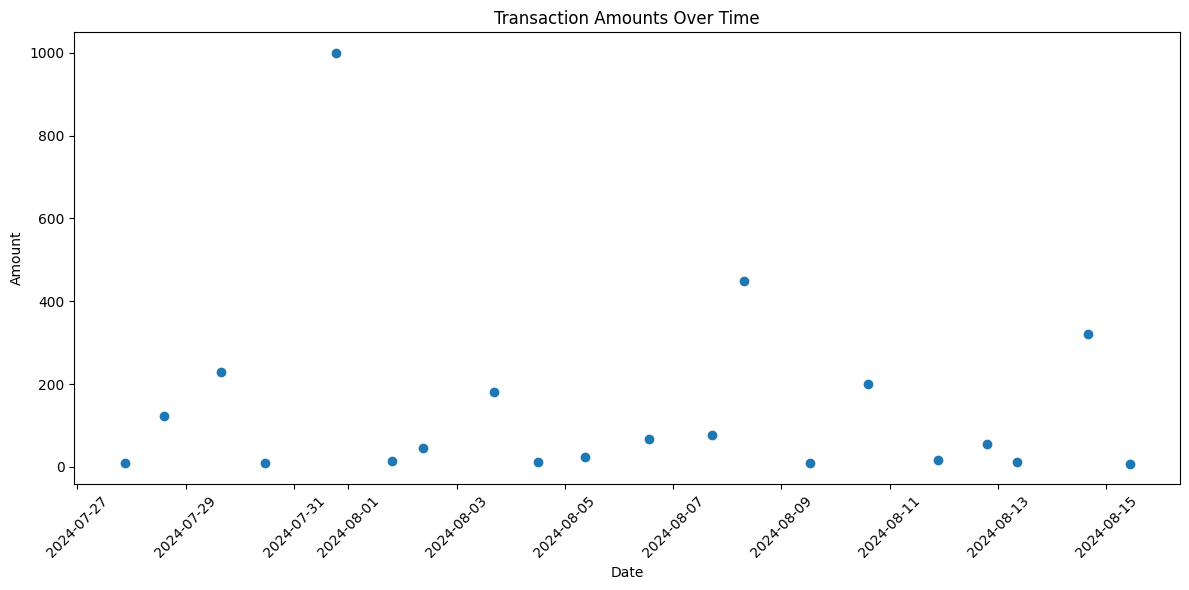

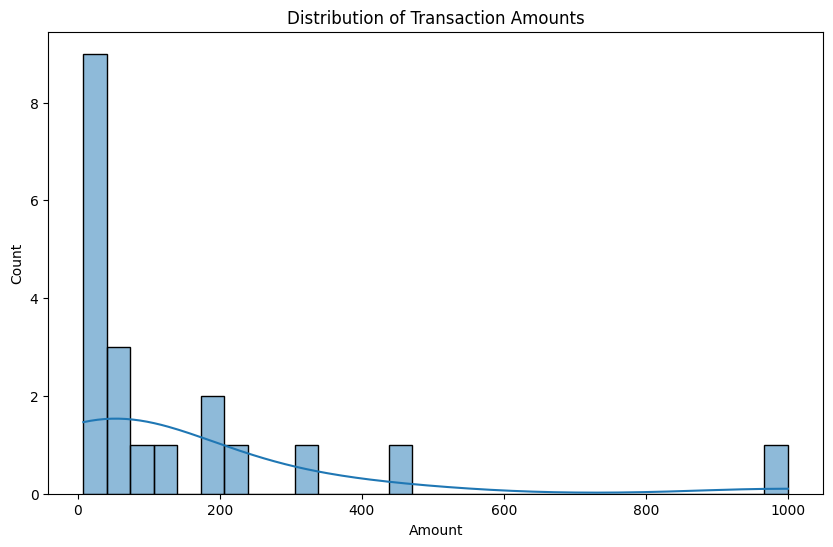

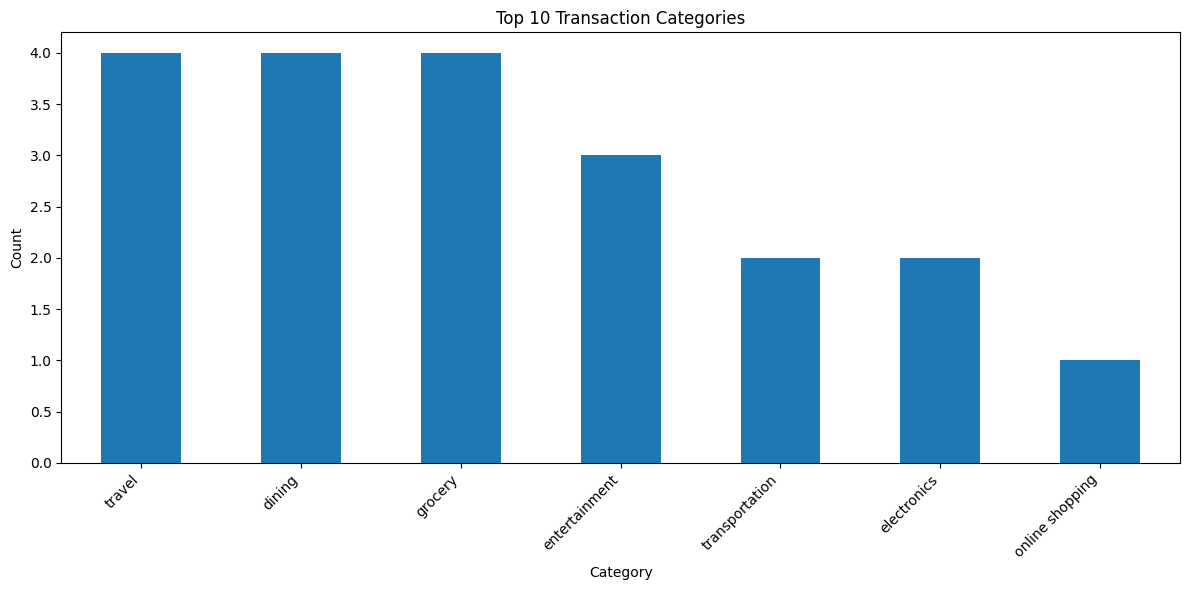

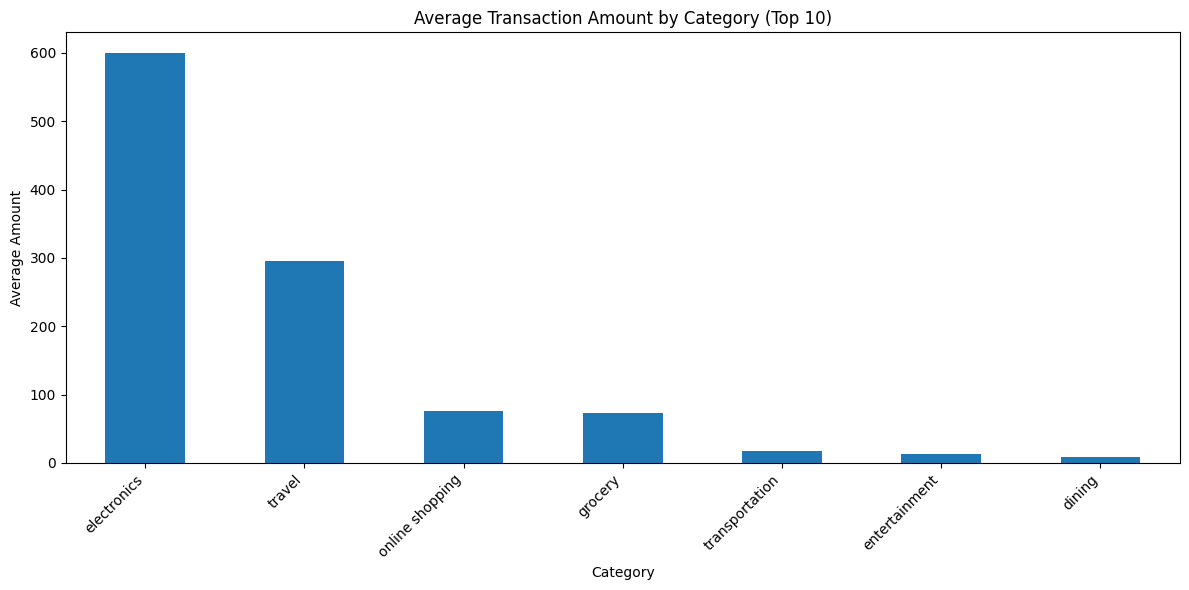

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


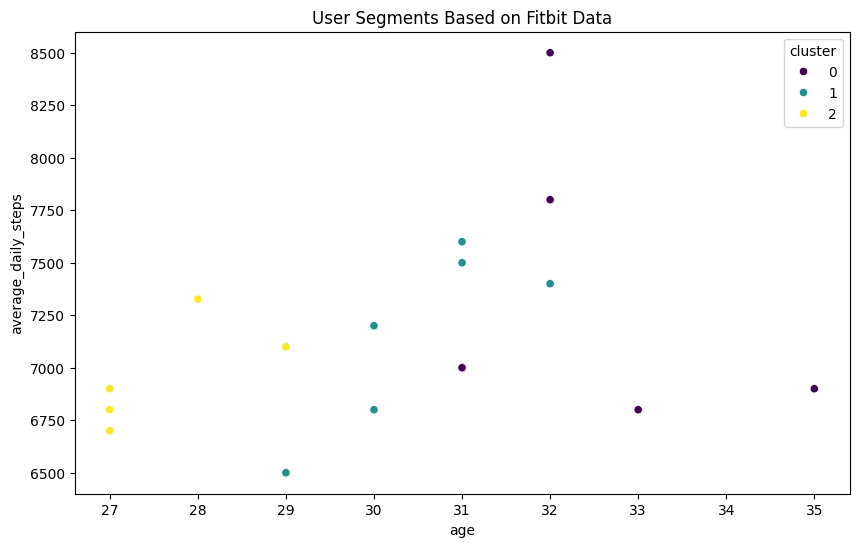

['Product 5', 'Product 13', 'Product 4', 'Product 15', 'Product 12']


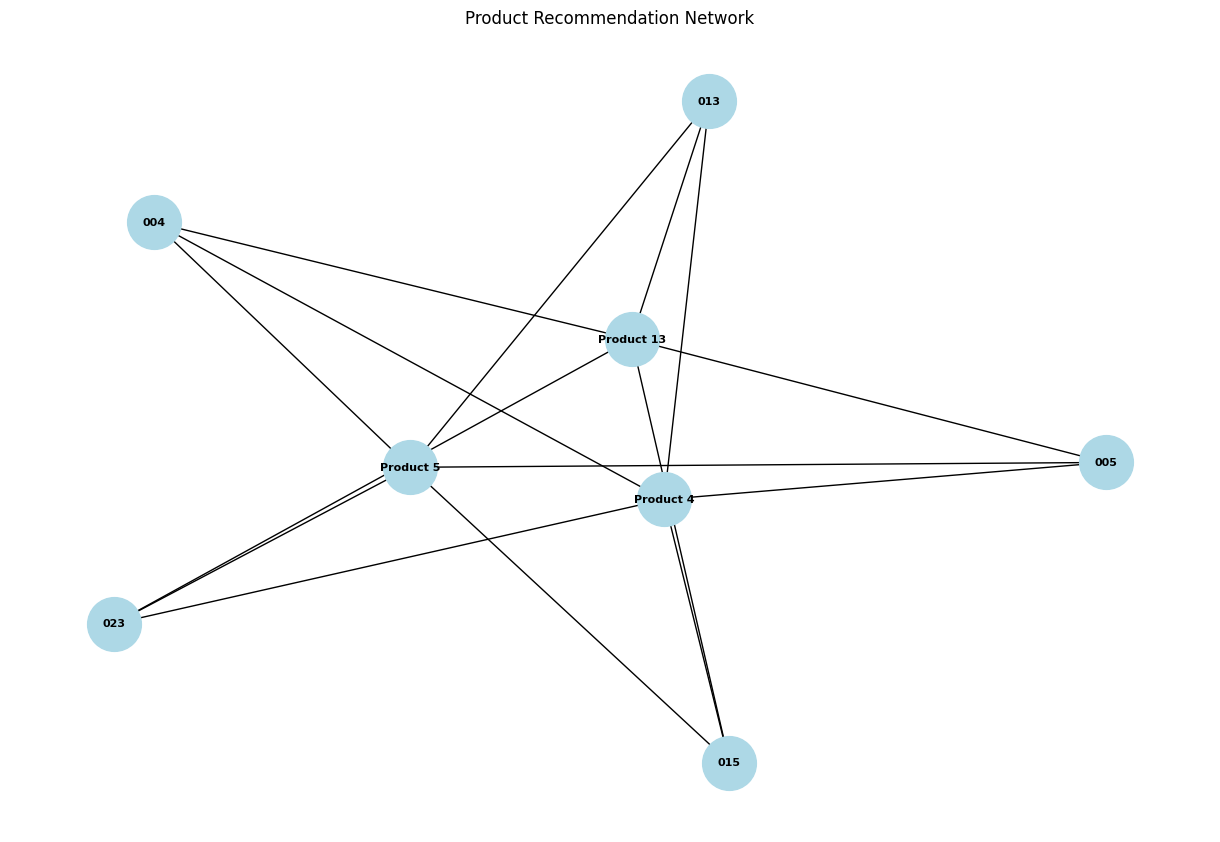

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx

# 1. Data Preprocessing
# Let's assume we've already loaded the dataframes as shown in the code

# 2. Exploratory Data Analysis (EDA) with Visualizations

# Example 1: Analyze Fitbit data - Average daily steps by age group
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_fitbit, x='age', y='average_daily_steps', hue='gender')
plt.title('Average Daily Steps by Age and Gender')
plt.show()

# Example 2: Analyze Spotify data - Distribution of followers
plt.figure(figsize=(10, 6))
sns.histplot(data=df_spotify, x='followers_total', bins=20, kde=True)
plt.title('Distribution of Spotify Followers')
plt.xlabel('Number of Followers')
plt.show()


# Example 3: Analyze Mastercard data - Transaction amounts over time
# We need to extract the transaction data from the nested structure
# Mastercard data processing
print("Mastercard DataFrame info:")
print(df_mastercard.info())
print("\nMastercard DataFrame head:")
print(df_mastercard.head())
print("\nMastercard DataFrame dtypes:")
print(df_mastercard.dtypes)

# Attempt to extract nested data
if df_mastercard.shape[1] == 1 and df_mastercard.dtypes[0] == 'object':
    # Assuming the nested data is in the first (and only) column
    nested_data = df_mastercard.iloc[:, 0].apply(pd.Series)

    if 'transaction_date' in nested_data.columns and 'transaction_amount' in nested_data.columns:
        df_transactions = nested_data
        df_transactions['transaction_date'] = pd.to_datetime(df_transactions['transaction_date'], format='mixed')
        df_transactions['transaction_amount'] = df_transactions['transaction_amount'].astype(float)

        # Visualization
        plt.figure(figsize=(12, 6))
        plt.scatter(df_transactions['transaction_date'], df_transactions['transaction_amount'])
        plt.title('Transaction Amounts Over Time')
        plt.xlabel('Date')
        plt.ylabel('Amount')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        # Additional visualizations
        # 1. Distribution of transaction amounts
        plt.figure(figsize=(10, 6))
        sns.histplot(df_transactions['transaction_amount'], bins=30, kde=True)
        plt.title('Distribution of Transaction Amounts')
        plt.xlabel('Amount')
        plt.show()

        # 2. Transaction categories
        plt.figure(figsize=(12, 6))
        category_counts = df_transactions['category'].value_counts().head(10)
        category_counts.plot(kind='bar')
        plt.title('Top 10 Transaction Categories')
        plt.xlabel('Category')
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

        # 3. Average transaction amount by category
        plt.figure(figsize=(12, 6))
        avg_amount_by_category = df_transactions.groupby('category')['transaction_amount'].mean().sort_values(ascending=False).head(10)
        avg_amount_by_category.plot(kind='bar')
        plt.title('Average Transaction Amount by Category (Top 10)')
        plt.xlabel('Category')
        plt.ylabel('Average Amount')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

    else:
        print("Unexpected column names in nested Mastercard data.")
        print("Available columns in nested data:", nested_data.columns)
else:
    print("Mastercard DataFrame structure is unexpected.")
    print("Available columns:", df_mastercard.columns)


# 3. Machine Learning for User Segmentation

# Let's use K-means clustering to segment users based on their Fitbit data
X = df_fitbit[['age', 'average_daily_steps', 'height']].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
df_fitbit['cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_fitbit, x='age', y='average_daily_steps', hue='cluster', palette='viridis')
plt.title('User Segments Based on Fitbit Data')
plt.show()

# 4. Building a Simple Recommender System

# Let's create a simple content-based recommender for Fairprice products
# First, we need to preprocess the Fairprice data
df_fairprice_products = pd.DataFrame([item for sublist in df_fairprice['sku_table'] for item in sublist])

# Create a simple feature vector for each product based on its category
df_fairprice_products['feature_vector'] = df_fairprice_products['sku_category'].apply(lambda x: [1 if category in x else 0 for category in ['Grocery', 'Fresh', 'Household', 'Electronics']])

# Calculate similarity between products
similarity_matrix = cosine_similarity(list(df_fairprice_products['feature_vector']))

# Function to get product recommendations
def get_recommendations(product_id, top_n=5):
    product_index = df_fairprice_products[df_fairprice_products['sku_id'] == product_id].index[0]
    similar_products = list(enumerate(similarity_matrix[product_index]))
    sorted_similar = sorted(similar_products, key=lambda x: x[1], reverse=True)[1:top_n+1]
    return [df_fairprice_products.iloc[i[0]]['sku_name'] for i in sorted_similar]

# Example recommendation
print(get_recommendations('001'))

# Visualize recommendation network for a few products
plt.figure(figsize=(12, 8))
G = nx.Graph()

for i in range(5):
    product_id = df_fairprice_products['sku_id'].iloc[i]
    G.add_node(product_id)
    recommendations = get_recommendations(product_id, top_n=3)
    for rec in recommendations:
        G.add_edge(product_id, rec)

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1500, font_size=8, font_weight='bold')
plt.title('Product Recommendation Network')
plt.axis('off')
plt.show()

# Fairprice Product Recommendation System

This code snippet implements a simple content-based recommendation system for Fairprice products using data retrieved from pods. Here's a breakdown of how it works:

1. **Data Preprocessing**:
   - The code extracts product information from the 'sku_table' column of the Fairprice data.
   - It creates a new DataFrame `df_fairprice_products` containing individual product details.

2. **Feature Vector Creation**:
   - For each product, a binary feature vector is created based on its category.
   - The vector has four dimensions representing 'Grocery', 'Fresh', 'Household', and 'Electronics'.
   - Each dimension is set to 1 if the product belongs to that category, and 0 otherwise.

3. **Similarity Calculation**:
   - Cosine similarity is calculated between all pairs of product feature vectors.
   - This results in a similarity matrix where each cell represents how similar two products are based on their categories.

4. **Recommendation Function**:
   - The `get_recommendations` function takes a product ID and returns similar products.
   - It finds the index of the given product, retrieves its similarity scores with all other products, sorts them, and returns the top N most similar products.

5. **Visualization**:
   - The code creates a graph visualization of the recommendation network.
   - It selects the first 5 products and their top 3 recommendations.
   - Each product is a node, and recommendations are represented by edges.

## How Pod Data is Used

The recommendation system primarily uses the Fairprice data from the pods:

1. **Product Information**: The 'sku_table' from the Fairprice data contains detailed product information, including product IDs, names, and categories.

2. **Category-Based Features**: The system creates feature vectors based on product categories, which are likely derived from the 'sku_category' field in the Fairprice data.

3. **Customer Insights**: While not directly used in this snippet, the customer information from the Fairprice data (e.g., customer age, transaction history) could be used to personalize recommendations further.

4. **Cross-Pod Potential**: Although not implemented in this basic version, the system could be enhanced by incorporating data from other pods:
   - Fitbit data could be used to recommend health-related products.
   - Spotify data might influence recommendations for electronics or music-related items.
   - YouTube viewing history could inform recommendations for related products.
   - Mastercard transaction data could provide insights into spending patterns and product preferences.
   - OCBC data might offer financial context for product recommendations.
   - Lazada data could provide additional insights into online shopping preferences.

By leveraging data from multiple pods, the recommendation system could be significantly enhanced to provide more personalized and context-aware product suggestions.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from transformers import pipeline

# Assuming user_data is already loaded

# Preprocess the Fairprice data
df_fairprice = pd.DataFrame([person['fairprice'] for person in user_data if person['fairprice']])

# Create user profiles based on Fairprice data
def create_user_profiles(df_fairprice):
    user_profiles = df_fairprice['customers'].apply(lambda x: x[0]).apply(lambda row: f"""
    Customer ID: {row.get('customer_id', 'N/A')}
    Age: {row.get('customer_age', 'N/A')}
    Gender: {row.get('customer_gender', 'N/A')}
    Preferred Language: {row.get('customer_preferred_language', 'N/A')}
    """)
    return user_profiles

# Find similar users based on Fairprice data
def find_similar_users(user_profiles, user_id, top_n=5):
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(user_profiles)
    cosine_similarities = cosine_similarity(tfidf_matrix[user_id:user_id+1], tfidf_matrix).flatten()
    similar_user_indices = cosine_similarities.argsort()[-top_n-1:-1][::-1]
    return similar_user_indices

# Generate personalized Fairprice recommendation
def generate_fairprice_recommendation(user_profile, similar_users_profiles, df_fairprice, user_id):
    # Initialize the language model
    generator = pipeline('text-generation', model='gpt2')

    # Get user-specific data
    user_data = df_fairprice.iloc[user_id]

    # Get recent transactions
    recent_transactions = user_data['transactions'][0] if user_data['transactions'] else {}
    recent_purchase = recent_transactions.get('sku_name', 'N/A') if recent_transactions else 'N/A'

    # Get store information
    store_info = user_data['stores'][0] if user_data['stores'] else {}
    store_name = store_info.get('store_name', 'N/A') if store_info else 'N/A'

    # Prepare the prompt
    prompt = f"""
    Based on the following Fairprice customer profile:
    {user_profile}

    And considering similar customers with profiles:
    {' '.join(similar_users_profiles)}

    Additional customer data:
    - Recent purchase: {recent_purchase}
    - Preferred store: {store_name}

    Generate a personalized Fairprice product recommendation and explanation:
    """

    # Generate the recommendation
    recommendation = generator(prompt, max_length=500, num_return_sequences=1)[0]['generated_text']

    return recommendation

# Main function to run the Fairprice recommendation system
def run_fairprice_recommendation_system():
    # Preprocess and create user profiles
    user_profiles = create_user_profiles(df_fairprice)

    # Generate recommendation for a random user
    user_id = np.random.randint(0, len(user_profiles))
    similar_user_indices = find_similar_users(user_profiles, user_id)
    similar_users_profiles = user_profiles.iloc[similar_user_indices].tolist()

    recommendation = generate_fairprice_recommendation(user_profiles.iloc[user_id], similar_users_profiles, df_fairprice, user_id)

    print(f"Personalized Fairprice Recommendation for Customer {user_id}:")
    print(recommendation)

# Run the Fairprice recommendation system
if __name__ == "__main__":
    run_fairprice_recommendation_system()

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Personalized Fairprice Recommendation for Customer 13:

    Based on the following Fairprice customer profile:
    
    Customer ID: 6789012
    Age: 26
    Gender: female
    Preferred Language: N/A
    
    
    And considering similar customers with profiles:
    
    Customer ID: 6789012
    Age: 26
    Gender: male
    Preferred Language: N/A
     
    Customer ID: 4567890
    Age: 29
    Gender: female
    Preferred Language: N/A
     
    Customer ID: 1234567
    Age: 37
    Gender: female
    Preferred Language: N/A
     
    Customer ID: 3456789
    Age: 50
    Gender: female
    Preferred Language: N/A
     
    Customer ID: 2345678
    Age: 35
    Gender: female
    Preferred Language: N/A
    
    
    Additional customer data:
    - Recent purchase: N/A
    - Preferred store: Finest Store 9
    
    Generate a personalized Fairprice product recommendation and explanation:
     
Thank you for downloading our service. You are now a member of our Customer Service Team.


Cust